In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [8]:
#General parameters
years = 15
time = int(261 * years)


#Import parameters
n = int(261 * np.random.uniform(0, 45))
n = int(261 * 21)
path = "data/msci_complete.csv"
limit = slice(n, time+n)


#Trade parameters
trades = 10 * years
max_trades = 20 * years
hold_time = [30,5,5,0]
time_after_reversel = 0
smooth_period = 20

trade_cost = [0,0]
spread = 0.00
asset_cost = 0.02
tax_rate = 0.25
tax_allowance = 1000


initial_investment = 5000
saving_plan_period = 22
#saving_plan = {12*i+1: 500 * 1.0**(i*12) for i in range(0,years)}
saving_plan = 500


chim =  ChartImport(  initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, 
                      trade_cost=trade_cost, spread=spread, asset_cost=asset_cost, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, dates = chim.load_data(path=path, limit=limit)

buy_and_hold_performance = chim.buy_and_hold()[0]
random_swing_performance = chim.random_swing_trade()[0]
swing_performance = chim.swing_trade()[0]


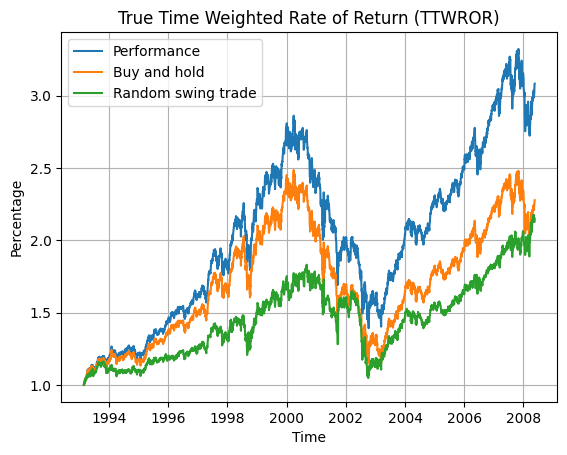

In [9]:
plt.plot(dates, chim.performance/chim.initial_investment, label="Performance")
plt.plot(dates, chim.buy_and_hold_ttwror, label="Buy and hold")
#plt.plot(dates, chim.swing_ttwror, label="Swing trade")
plt.plot(dates, chim.random_swing_ttwror, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title("True Time Weighted Rate of Return (TTWROR)")

plt.grid()
plt.legend()

plt.show()

AttributeError: 'ChartImport' object has no attribute 'swing_performance'

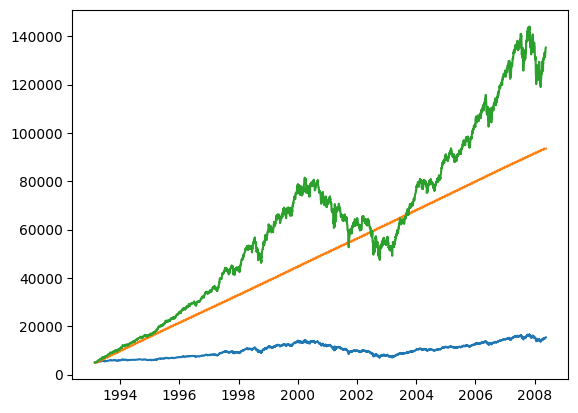

In [10]:
plt.plot(dates, chim.performance, label="Index")
plt.plot(dates, chim.investet_over_time, label="Investment over time")
plt.plot(dates, chim.buy_and_hold_performance, label="Buy and hold")
plt.plot(dates, chim.swing_performance, label="Swing trade")
plt.plot(dates, chim.random_swing_performance, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()

#chim.print_parameters()
chim.print_results(accuracy=1)
#chim.plot_performance()

In [ ]:
mc = MonteCarloSimulation(chartimp=chim, parallel=True)
_ = mc.mc_import_chart(n=2000, stepsize=2, path=path, limit=limit)

# mc.hist_performance(limits=None, bins=30)

In [ ]:
bins=30
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=1)